<a href="https://colab.research.google.com/github/valentnluc/historical-analysis-of-football-teams/blob/main/Analisis_historico_selecciones_de_futbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette='mako')
sns.color_palette("mako", as_cmap=True)

from datetime import datetime

In [ ]:
url = 'https://raw.githubusercontent.com/martj42/international_results/master/results.csv'
df = pd.read_csv(url)

In [ ]:
df.shape  

(43421, 9)

In [ ]:
df.sample(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
26362,2004-01-01,Kuwait,Yemen,4,0,Gulf Cup,Kuwait City,Kuwait,False
7150,1969-04-23,Spain,Mexico,0,0,Friendly,Seville,Spain,False
41944,2020-10-14,Estonia,Armenia,1,1,UEFA Nations League,Tallinn,Estonia,False
9762,1976-03-04,Nigeria,Sudan,1,0,African Cup of Nations,Dire Dawa,Ethiopia,True
16548,1991-04-03,Switzerland,Romania,0,0,UEFA Euro qualification,Neuchâtel,Switzerland,False
3693,1954-07-25,Curaçao,Netherlands,2,0,Friendly,Willemstad,Netherlands Antilles,False
22222,1999-06-16,South Korea,Egypt,0,0,Korea Cup,Seoul,South Korea,False
20307,1996-12-25,Benin,Burkina Faso,1,1,Friendly,Cotonou,Benin,False
11762,1980-12-21,El Salvador,Guatemala,1,0,CONCACAF Championship qualification,San Salvador,El Salvador,False
22394,1999-08-18,Slovakia,Israel,1,0,Friendly,Bratislava,Slovakia,False


In [ ]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#Ajustamos tipo columnda date
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
def outcome(row):
    if row['home_score'] < row["away_score"]:
        return -1
    elif row['home_score'] > row["away_score"]:
        return 1
    else:
        return 0

df['home_outcome'] = df.apply(outcome, axis=1)

df["total_score"] = df.home_score + df.away_score

In [ ]:
df.sample(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_outcome,total_score
1322,1930-07-18,Estonia,Sweden,1,5,Friendly,Tallinn,Estonia,False,-1,6
25109,2002-08-21,Iceland,Andorra,3,0,Friendly,Reykjavík,Iceland,False,1,3
3912,1956-02-05,Paraguay,Peru,1,1,Copa América,Montevideo,Uruguay,True,0,2
519,1919-06-29,Norway,Sweden,4,3,Friendly,Kristiania,Norway,False,1,7
23947,2001-04-07,Fiji,American Samoa,13,0,FIFA World Cup qualification,Coffs Harbour,Australia,True,1,13
40402,2018-10-16,Iran,Bolivia,2,1,Friendly,Tehran,Iran,False,1,3
16572,1991-04-17,Poland,Turkey,3,0,UEFA Euro qualification,Warsaw,Poland,False,1,3
32798,2010-11-17,Sweden,Germany,0,0,Friendly,Gothenburg,Sweden,False,0,0
34091,2012-02-29,Liberia,Namibia,1,0,African Cup of Nations qualification,Monrovia,Liberia,False,1,1
30528,2008-06-15,Lesotho,Libya,0,1,FIFA World Cup qualification,Bloemfontein,South Africa,True,-1,1


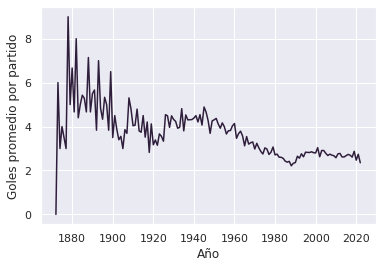

In [ ]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df['year'] = pd.DatetimeIndex(df['date']).year

dfy = df.groupby("year").mean()
ax = sns.lineplot(data=dfy, x="year", y= "total_score" )
ax.set(xlabel='Año', ylabel='Goles promedio por partido')
plt.show()
del dfy

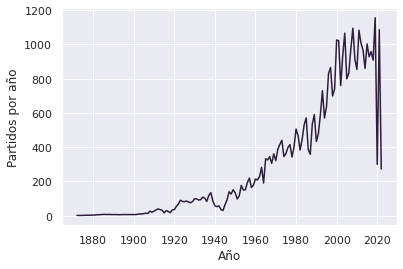

In [ ]:
dfy = df.groupby('year').count()
ax = sns.lineplot(data=dfy, x="year", y="date")
ax.set(xlabel='Año', ylabel='Partidos por año')
plt.show()
del dfy

In [ ]:
dfy = df.groupby(['year','home_team']).mean() #Agrupamos por pais y año, y calculamos la media para los otros valores
dfy = dfy.drop(['neutral','home_outcome', 'total_score'], axis=1) #Descartamos valores inecesarios 

#Creamos dos df temporales para obtener el numero de partidos jugados por año indistintamente si es de local o visitante.
df1 = df.groupby(['year','home_team']).count().drop(['neutral','home_outcome', 'total_score','date', 'away_team', 'home_score','away_score', 'tournament', 'city'], axis=1)

df2 = df.drop(['home_team','neutral','home_outcome', 'total_score','date','home_score','away_score', 'tournament', 'city'], axis=1)
df2 = df2.rename(columns = {'away_team': 'home_team'}, inplace = False)
df2 = df2.groupby(['year','home_team']).count()

dfy['games'] = df1['country'] + df2['country']
del df1
del df2

#partidos ganados empatados y perdidos de local
dfy['h_win'] = df.loc[df["home_outcome"] == 1].groupby(['year','home_team']).count()["home_outcome"]
dfy['h_loss'] = df.loc[df["home_outcome"] == -1].groupby(['year','home_team']).count()["home_outcome"]
dfy['h_tie'] = df.loc[df["home_outcome"] == 0].groupby(['year','home_team']).count()["home_outcome"]

#partidos ganados empatados y perdidos de visitante
dfy['a_win'] = df.loc[df["home_outcome"] == -1].groupby(['year','away_team']).count()["home_outcome"]
dfy['a_loss'] = df.loc[df["home_outcome"] == 1].groupby(['year','away_team']).count()["home_outcome"]
dfy['a_tie'] = df.loc[df["home_outcome"] == 0].groupby(['year','away_team']).count()["home_outcome"]

dfy = dfy.fillna(0) #Reemplazamos los NaN por 0

#partidos ganados empatados y perdidos en general
dfy['g_win'] = dfy['h_win'] + dfy['a_win']
dfy['g_loss'] = dfy['h_loss'] + dfy['a_loss']
dfy['g_tie'] = dfy['h_tie'] + dfy['a_tie']
 
#N° partidos neutrales

dfy['Neutral_Games'] = 

#N° partidos local

#N° partidos visitante


In [ ]:
dfy.sample(10)

,,home_score,away_score,games,h_win,h_loss,h_tie,a_win,a_loss,a_tie,g_win,g_loss,g_tie
year,home_team,,,,,,,,,,,,
1932,Greece,1.000000,2.333333,5.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,4.0,1.0
1988,Benin,0.500000,2.250000,5.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0
1963,Senegal,1.000000,1.500000,4.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,3.0,1.0
1972,Malawi,1.750000,0.500000,0.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0
1947,Trinidad and Tobago,2.500000,0.500000,11.0,3.0,1.0,0.0,2.0,4.0,1.0,5.0,5.0,1.0
1996,Egypt,2.400000,1.200000,10.0,3.0,1.0,1.0,2.0,2.0,1.0,5.0,3.0,2.0
1970,Haiti,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1989,China PR,1.714286,0.714286,17.0,5.0,2.0,0.0,3.0,5.0,2.0,8.0,7.0,2.0
2008,Zambia,1.250000,0.000000,17.0,3.0,0.0,1.0,3.0,7.0,3.0,6.0,7.0,4.0
